# Deutsch-Jozsa Algoritması

Bu bölümde önce Deutsch-Jozsa problemini, ardından problemi çözmek için kullanılan klasik ve kuantum algoritmaları tanıtıyoruz. Sonra kuantum algoritmayı Qiskit kullanarak gerçekleştiriyor, bir simülatörde ve gerçek bir cihazda çalıştırıyoruz.

## 1. Giriş <a id='introduction'></a>

Deutsch-Jozsa algoritması, ilk kez Kaynak [1]'de tanıtılan, en iyi klasik algoritmadan daha iyi performans gösteren ilk kuantum algoritması örneğidir. Bu sonuç, belirli bir problem için kuantum bilgisayar kullanmanın avantajları olabileceğini göstermiştir.

### 1.1 Deutsch-Jozsa Problemi <a id='djproblem'></a>

Girdi olarak bit dizisi alan ve çıktı olarak ya $0$ ya da $1$ veren gizli bir Boole fonksiyonu $f$ verilsin:

$$
f(\{x_0,x_1,x_2,\dots\}) \;\rightarrow\; 0 \textrm{ veya } 1 \,,\quad \text{burada } x_n \in \{0,1\}
$$

Verilen Boole fonksiyonunun özelliği, **dengeli (balanced)** veya **sabit (constant)** olmasının **garanti** edilmesidir. Sabit bir fonksiyon, hangi girdi verilirse verilsin ya hep $0$ ya da hep $1$ döndürürken; dengeli bir fonksiyon, olası tüm girdilerin tam yarısında $0$, diğer yarısında $1$ döndürür. Görevimiz, fonksiyonun dengeli mi yoksa sabit mi olduğunu belirlemektir.

Deutsch-Jozsa problemi, tek bitlik Deutsch probleminin $n$-bit genellemesidir.

### 1.2 Klasik Çözüm <a id='classical-solution'></a>

Klasik olarak, **en iyi senaryoda** saklı Boole fonksiyonunun dengeli olup olmadığını anlamak için iki oracle sorgusu yeterlidir:  
Örneğin hem $f(0,0,0,\dots)\rightarrow0$ hem de $f(1,0,0,\dots)\rightarrow1$ çıktısını alırsak, iki farklı çıktı gördüğümüz için fonksiyonun dengeli olduğunu biliriz.

**En kötü senaryoda** ise, her denemede aynı çıktıyı görmeye devam edersek, fonksiyonun sabit olduğundan emin olmak için tüm olası girdilerin tam yarısı **artı bir** tanesini kontrol etmemiz gerekir. Toplam olası girdi sayısı $2^n$ olduğundan, en kötü durumda fonksiyonun sabit olduğundan emin olmak için $2^{n-1}+1$ deneme girdisine ihtiyaç vardır. Örneğin $4$-bitlik bir dizi için, $16$ olası kombinasyondan $8$ tanesini deneyip hepsinde $0$ alırsak, $9.$ girdinin $1$ döndürmesi ve fonksiyonun dengeli çıkması hâlâ mümkündür. Olasılık açısından bu çok düşük bir ihtimaldir. Ardışık olarak aynı sonucu görmeye devam edersek, fonksiyonun sabit olma olasılığını, kullanılan $k$ girdi sayısına bağlı olarak şöyle ifade edebiliriz:

$$
P_\textrm{constant}(k) \;=\; 1 - \frac{1}{2^{k-1}}
\qquad
\bigl(1 < k \le 2^{n-1}\bigr)
$$

Pratikte, klasik algoritmamızı belli bir güven eşiğinde (örneğin %x) erken sonlandırmayı tercih edebiliriz. Ancak %100 emin olmak istersek, **mutlaka** $2^{n-1}+1$ girdi denememiz gerekir.

### 1.3 Kuantum Çözüm <a id='quantum-solution'></a>

Bir kuantum bilgisayar kullanarak, $f(x)$ fonksiyonunu **yalnızca bir kez** çağırarak problemi %100 güvenle çözebiliriz; bunun için fonksiyonun kuantum bir oracle olarak gerçekleştirildiğini varsayarız. Oracle, durumu
$\lvert x\rangle\lvert y\rangle$
\,$\longrightarrow$\,
$\lvert x\rangle\lvert y \oplus f(x)\rangle$
şeklinde haritalar; burada $\oplus$ mod 2 toplamadır. Aşağıda Deutsch-Jozsa algoritmasının genel devresi görülmektedir.

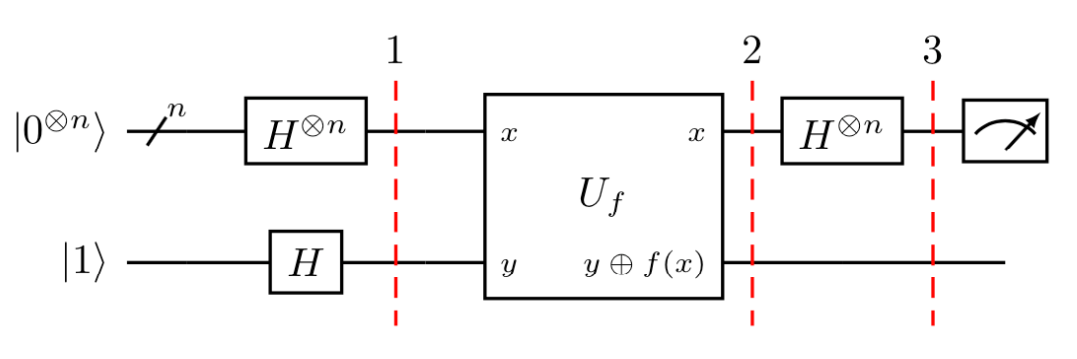

Algoritmanın adımlarını inceleyelim:

1. **İki kuantum register hazırla.** Birincisi $n$-kubitlik olup $|0\rangle$ durumuna, ikincisi ise tek kubitlik olup $|1\rangle$ durumuna ayarlanır:

   $$
   \lvert \psi_0 \rangle \;=\; \lvert0\rangle^{\otimes n}\lvert1\rangle
   $$

2. **Her bir kubite Hadamard kapısı uygula:**

   $$
   \lvert \psi_1 \rangle
   \;=\;
   \frac{1}{\sqrt{2^{\,n+1}}}\sum_{x=0}^{2^{n}-1}
   \lvert x\rangle
   \bigl(\lvert0\rangle - \lvert1\rangle\bigr)
   $$

3. **Kuantum oracle’ı uygula** 
   $\lvert x\rangle\lvert y\rangle \;\mapsto\; \lvert x\rangle\lvert y \oplus f(x)\rangle$:

   $$
   \begin{aligned}
   \lvert \psi_2 \rangle &=
   \frac{1}{\sqrt{2^{\,n+1}}}
   \sum_{x=0}^{2^{n}-1}
   \lvert x\rangle
   \bigl(\lvert f(x)\rangle - \lvert 1 \oplus f(x)\rangle\bigr) \\[4pt]
   &= \frac{1}{\sqrt{2^{\,n+1}}}
   \sum_{x=0}^{2^{n}-1}
   (-1)^{f(x)}\lvert x\rangle
   \bigl(\lvert0\rangle - \lvert1\rangle\bigr)
   \end{aligned}
   $$

   çünkü her $x$ için $f(x)\in\{0,1\}$’dir.

4. Bu noktada ikinci (tek kubitlik) register göz ardı edilebilir. **İlk register’daki her kubite bir Hadamard daha uygula:**

   $$
   \begin{aligned}
   \lvert \psi_3 \rangle
   &= \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}(-1)^{f(x)}
      \bigl[\,
      \sum_{y=0}^{2^{n}-1}(-1)^{x\cdot y}
      \lvert y\rangle
      \bigr] \\[4pt]
   &= \frac{1}{2^{n}}\sum_{y=0}^{2^{n}-1}
      \bigl[\,
      \sum_{x=0}^{2^{n}-1}
      (-1)^{f(x)}(-1)^{x\cdot y}
      \bigr]
      \lvert y\rangle
   \end{aligned}
   $$

   Burada $x\cdot y = x_0y_0 \oplus x_1y_1 \oplus \dots \oplus x_{n-1}y_{n-1}$ bit-bit çarpım toplamıdır.

5. **İlk register’ı ölç.** 
   $\lvert0\rangle^{\otimes n}$ ölçülme olasılığı

   $$
      \left|\;
      \frac{1}{2^{n}}
      \sum_{x=0}^{2^{n}-1}
      (-1)^{f(x)}
      \right|^{2}
   $$

   ifadesiyle verilir; fonksiyon sabitse bu olasılık $1$’dir, dengeliyse $0$’dır.

### 1.4 Neden Çalışır? <a id='why-does-this-work'></a>

- **Sabit Oracle**

  Oracle *sabit* olduğunda, giriş kubitlerine (küresel faz dışında) hiçbir etkisi olmaz; oracle’dan önceki ve sonraki kuantum durumları aynıdır. H-kapısı kendi tersidir, bu yüzden Adım 4’te Adım 2’yi geri çevirerek ilk register’ı yine $|00\dots0\rangle$ durumuna getiririz.

  $$
  H^{\otimes n}
  \begin{bmatrix}
      1 \\ 0 \\ 0 \\ \vdots \\ 0
  \end{bmatrix}
  = \tfrac{1}{\sqrt{2^{\,n}}}
  \begin{bmatrix}
      1 \\ 1 \\ 1 \\ \vdots \\ 1
  \end{bmatrix}
  \;\xrightarrow{U_f}\;
  H^{\otimes n}
  \tfrac{1}{\sqrt{2^{\,n}}}
  \begin{bmatrix}
      1 \\ 1 \\ 1 \\ \vdots \\ 1
  \end{bmatrix}
  =
  \begin{bmatrix}
      1 \\ 0 \\ 0 \\ \vdots \\ 0
  \end{bmatrix}
  $$

- **Dengeli Oracle**

  Adım 2’den sonra giriş register’ı, hesaplama tabanındaki tüm durumların eşit süperpozisyonundadır. Oracle *dengeli* olduğunda, faz geri tepkisi (phase kick-back) bu durumların tam yarısına negatif bir faz ekler:

  $$
  U_f
  \tfrac{1}{\sqrt{2^{\,n}}}
  \begin{bmatrix}
      1 \\ 1 \\ 1 \\ \vdots \\ 1
  \end{bmatrix}
  =
  \tfrac{1}{\sqrt{2^{\,n}}}
  \begin{bmatrix}
      -1 \\ 1 \\ -1 \\ \vdots \\ 1
  \end{bmatrix}
  $$

  Oracle’dan sonraki kuantum durumu, oracle’dan önceki duruma ortogonaldir. Dolayısıyla Adım 4’te uygulanan H-kapıları sonucu, $|00\dots0\rangle$’a ortogonal bir kuantum durum elde ederiz; bu nedenle tüm-sıfır durumunu **asla** ölçmeyiz.

## 2. Çalışılmış Örnek <a id='example'></a>

İki bitlik dengeli bir fonksiyon için somut bir örnek inceleyelim:

İki bitlik 
$f(x_0,x_1)=x_0 \oplus x_1$
fonksiyonunu ele alalım:

\
\begin{aligned}
f(0,0) &= 0 \\
f(0,1) &= 1 \\
f(1,0) &= 1 \\
f(1,1) &= 0
\end{aligned}


Bu iki bitlik fonksiyonun faz oracle’ı

$U_f \lvert x_1, x_0 \rangle = (-1)^{f(x_1, x_0)}\lvert x \rangle$

şeklindedir.

Şimdi aşağıdaki başlangıç durumu üzerinden oracle’ın beklendiği gibi çalışıp çalışmadığını kontrol edelim:

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

1. **Register’ların hazırlanması**  
   İlk (iki-kubitlik) register $|00\rangle$, ikinci (tek kubitlik) register $|1\rangle$ durumuna ayarlanır.

2. **Tüm kubitlere Hadamard uygula**

   $$
   \lvert \psi_1 \rangle
   = \frac{1}{2}
   \bigl(
      \lvert 00\rangle + \lvert 01\rangle
      + \lvert 10\rangle + \lvert 11\rangle
   \bigr)_{01}
   \otimes
   \frac{1}{\sqrt{2}}
   \bigl(\lvert0\rangle - \lvert1\rangle\bigr)_{2}
   $$

3. **Oracle uygulaması**  
   $\text{Q}_f = CX_{02} CX_{12}$ olarak gerçekleştirilebilir:

   $$
   \begin{aligned}
   \lvert \psi_2 \rangle
   = \frac{1}{2\sqrt{2}}
   \bigl[\, &
   \lvert00\rangle_{01}
   \otimes
   \bigl(\lvert0\oplus0\oplus0\rangle
         - \lvert1\oplus0\oplus0\rangle\bigr)_{2} \\
   +\;&
   \lvert01\rangle_{01}
   \otimes
   \bigl(\lvert0\oplus0\oplus1\rangle
         - \lvert1\oplus0\oplus1\rangle\bigr)_{2} \\
   +\;&
   \lvert10\rangle_{01}
   \otimes
   \bigl(\lvert0\oplus1\oplus0\rangle
         - \lvert1\oplus1\oplus0\rangle\bigr)_{2} \\
   +\;&
   \lvert11\rangle_{01}
   \otimes
   \bigl(\lvert0\oplus1\oplus1\rangle
         - \lvert1\oplus1\oplus1\rangle\bigr)_{2}
   \bigr]
   \end{aligned}
   $$

4. **Sadeleştirme**

   $$
   \begin{aligned}
   \lvert \psi_2 \rangle
   &= \frac{1}{2\sqrt{2}}
      \bigl[
         \lvert00\rangle_{01}
         \otimes(\lvert0\rangle-\lvert1\rangle)_{2}
       - \lvert01\rangle_{01}
         \otimes(\lvert0\rangle-\lvert1\rangle)_{2} \\
   &\quad
       - \lvert10\rangle_{01}
         \otimes(\lvert0\rangle-\lvert1\rangle)_{2}
       + \lvert11\rangle_{01}
         \otimes(\lvert0\rangle-\lvert1\rangle)_{2}
      \bigr] \\[4pt]
   &= \frac{1}{2}
      \bigl(
         \lvert00\rangle - \lvert01\rangle
         - \lvert10\rangle + \lvert11\rangle
      \bigr)_{01}
      \otimes
      \frac{1}{\sqrt{2}}
      \bigl(\lvert0\rangle-\lvert1\rangle\bigr)_{2} \\[4pt]
   &= \frac{1}{\sqrt{2}}
      \bigl(\lvert0\rangle-\lvert1\rangle\bigr)_{0}
      \otimes
      \frac{1}{\sqrt{2}}
      \bigl(\lvert0\rangle-\lvert1\rangle\bigr)_{1}
      \otimes
      \frac{1}{\sqrt{2}}
      \bigl(\lvert0\rangle-\lvert1\rangle\bigr)_{2}
   \end{aligned}
   $$

5. **İlk register’a Hadamard uygula**

   $$
   \lvert \psi_3 \rangle
   = \lvert1\rangle_{0}
     \otimes \lvert1\rangle_{1}
     \otimes
     \bigl(\lvert0\rangle-\lvert1\rangle\bigr)_{2}
   $$

6. **Ölçüm**  
   İlk iki kubiti ölçtüğümüzde $11$ sonucunu elde ederiz; bu, fonksiyonun dengeli olduğunu gösterir.

## 3. Kuantum Oracle’ları Oluşturmak <a id='creating-quantum-oracles'></a>

Farklı şekillerde kuantum oracle’ları oluşturabiliriz.

### Sabit Fonksiyon

1. Eğer $f(x)=0$ ise, 2. register’daki kubite $I$ kapısı uygula.  
2. Eğer $f(x)=1$ ise, aynı kubite $X$ kapısı uygula.

### Dengeli Fonksiyon

Dengeli bir oracle oluşturmanın pek çok yolu vardır. Kesin dengeli olduğundan emin olmanın bir yolu, 1. register’daki **her** kubiti kontrol (control), 2. register’daki kubiti hedef (target) yaparak bir CNOT uygulamaktır. Örneğin:

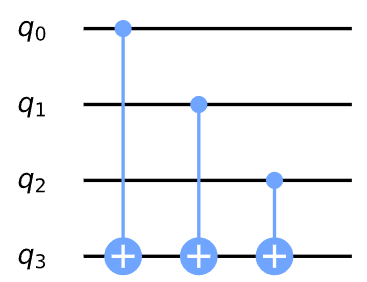

Yukarıdaki görselde üstteki üç kubit giriş register’ını, alttaki kubit çıkış register’ını temsil eder. Hangi girişlerin hangi çıktıyı verdiği aşağıdaki tabloda gösterilmiştir:

| 0 Döndüren Girişler | 1 Döndüren Girişler |
|:-------------------:|:-------------------:|
| 000 | 001 |
| 011 | 100 |
| 101 | 010 |
| 110 | 111 |

Sonuçları dengeli tutarak değiştirmek için seçili kontrolları X-kapılarıyla sarmalayabiliriz. Örneğin aşağıdaki devre ve tablosuna bakınız:

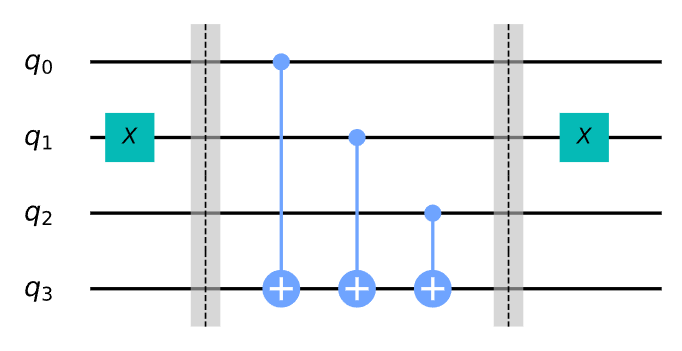

| 0 Döndüren Girişler | 1 Döndüren Girişler |
|:-------------------:|:-------------------:|
| 001 | 000 |
| 010 | 011 |
| 100 | 101 |
| 111 | 110 |


## 4. Qiskit Uygulaması <a id='implementation'></a>

Şimdi Deutsch-Jozsa algoritmasını üç bitlik bir fonksiyon örneği için hem sabit hem de dengeli oracle'larla uygulayacağız. Önce gerekli importları yapalım:

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

### 4.1 Sabit (Constant) Oracle <a id='const_oracle'></a>

Sabit bir oracle (Kara Kutu) oluşturarak başlayalım, bu durumda girdinin çıktı üzerinde hiçbir etkisi yoktur, bu yüzden çıktı kübitini rastgele 0 veya 1 olarak ayarlarız:

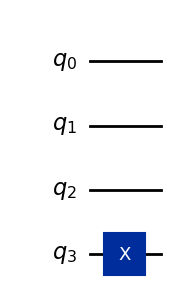

In [2]:
#  n bitlik giriş dizisinin uzunluğunu ayarlar.

n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw(output='mpl')

### 4.2 Dengeli (Balanced) Oracle <a id='balanced_oracle'></a>

In [3]:
balanced_oracle = QuantumCircuit(n+1)

Daha sonra, dengeli bir oracle oluşturacağız. Bölüm 1b'de gördüğümüz gibi, her bir giriş kübiti kontrol ve çıkış biti hedef olacak şekilde CNOT'lar gerçekleştirerek dengeli bir oracle oluşturabiliriz. Bazı kontrolleri X kapılarına sararak 0 veya 1 veren giriş durumlarını değiştirebiliriz. Öncelikle hangi kontrollerin sarılacağını belirleyen `n` uzunluğunda bir ikili dizi seçelim:

In [4]:
b_str = "101"

Şimdi bu diziyi X-kapılarımızı yerleştirmek için bir anahtar olarak kullanabiliriz. Devremizdeki her kubit için, `b_str`deki karşılık gelen bit `1` ise bir X kapısı yerleştiririz veya bit `0` ise hiçbir şey yapmayız.

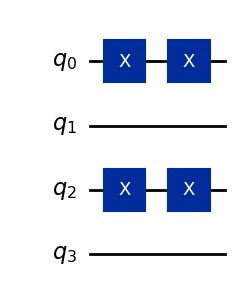

In [6]:
# X kapılarını yerleştirelim

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw(output='mpl')

Ardından, her bir giriş kübitini bir kontrol ve çıkış kübitini bir hedef olarak kullanarak kontrollü-NOT kapılarımızı yapıyoruz:

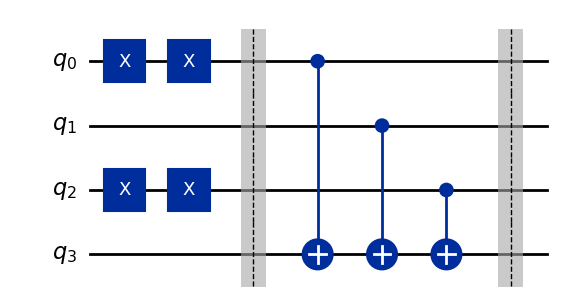

In [7]:
# Bariyeri bölücü olarak kullanın
balanced_oracle.barrier()

# Kontrollü-NOT kapısı Uygulayalım
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw(output='mpl')

Son olarak, kontrolleri X kapılarına sarmayı bitirmek için kodu iki hücre yukarıdan tekrarlıyoruz:

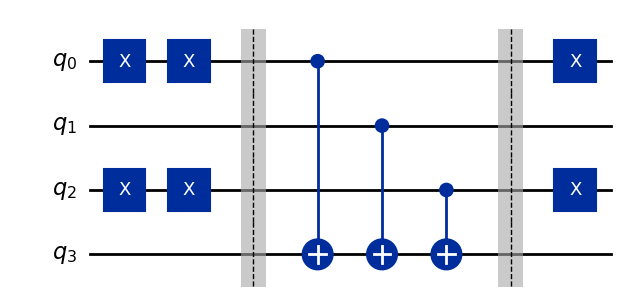

In [8]:
# X kapılarını son olarak yerleştirelim

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.draw(output='mpl')

Az önce dengeli bir oracle yarattık! Geriye kalan tek şey Deutsch-Jozsa algoritmasının bunu çözüp çözemeyeceğini görmek.

### 4.3 The Full Algoritma <a id='full_alg'></a>

Şimdi her şeyi bir araya getirelim. Algoritmadaki bu ilk adım, giriş kübitlerini $|{+}\rangle$ durumunda ve çıkış kübitini $|{-}\rangle$ durumunda başlatmaktır:

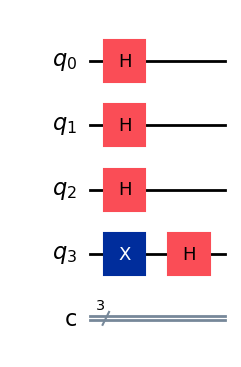

In [9]:
dj_qc = QuantumCircuit(n+1, n)

# Hadamard kapısı uygulayalım H

for qubit in range(n):
    dj_qc.h(qubit)

# Kübiti |-> durumuna ayarlayalım

dj_qc.x(n)
dj_qc.h(n)
dj_qc.draw(output='mpl')

Sonra, oracle'ı uygulayalım. Burada yukarıda oluşturduğumuz `balanced_oracle`ı uyguluyoruz:

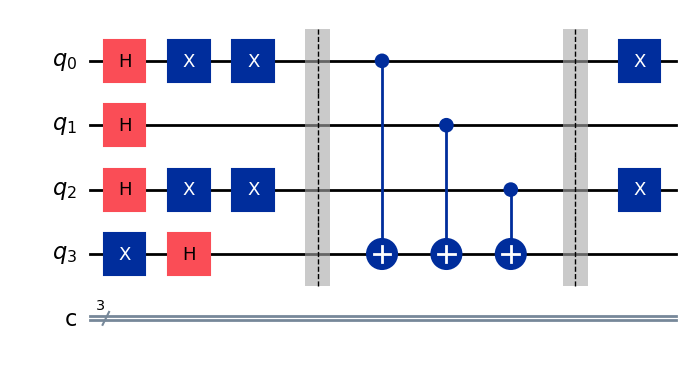

In [10]:
dj_qc = dj_qc.compose(balanced_oracle)
dj_qc.draw(output='mpl')

Son olarak, $n$-giriş kübitleri üzerinde H-kapıları gerçekleştiriyoruz ve giriş kaydımızı ölçüyoruz:

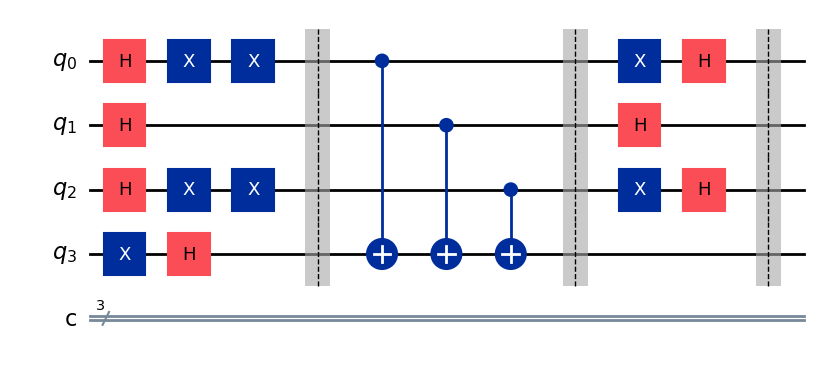

In [11]:
# Hadamard kapılarını H tekrarlayalım

for qubit in range(n):
    dj_qc.h(qubit)
dj_qc.barrier()
dj_qc.draw(output='mpl')

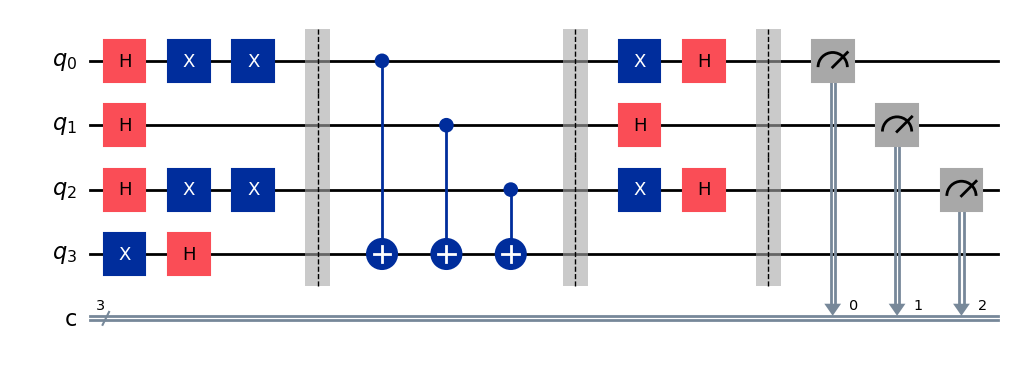

In [12]:
# Ölçüm

for i in range(n):
    dj_qc.measure(i,i)

dj_qc.draw(output='mpl')

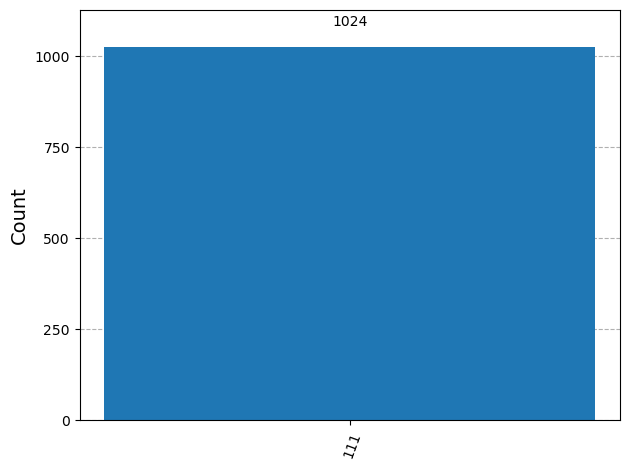

In [13]:
# Sonuçları görelim

aer_sim = AerSimulator()
qc_compiled = transpile(dj_qc, aer_sim)
job = aer_sim.run(qc_compiled)
results = job.result()
plot_histogram(results.get_counts(dj_qc))

### 4.4 Genelleştirilmiş Devreler <a id='general_circs'></a>

Aşağıda, Deutsch-Jozsa oracle'ları oluşturan ve bunları kuantum kapılarına dönüştüren genelleştirilmiş bir işlev sunuyoruz. Bu fonksiyon “durum” (ya “dengeli” ya da ‘sabit’) ve “n”, giriş kaydının boyutunu alır:

In [17]:
def dj_oracle(case, n):
    # Döndürmek için bir QuantumCircuit nesnesi yapmamız gerekiyor
    # Bu devrede n+1 kübit vardır: girişin boyutu,
    # artı bir çıkış kübiti

    oracleCirq = QuantumCircuit(n+1)

    # İlk olarak, oracle'ın dengeli olduğu durumla ilgilenelim
    if case == "balanced":
        # Önce bize hangi CNOT'ların kullanılacağını söyleyen rastgele bir sayı üretin
        # X kapılarına sarın:
        b = np.random.randint(1, 2**n)
        # Ardından, ‘b'yi sıfırlarla doldurulmuş 'n’ uzunluğunda bir ikili dizi olarak biçimlendirin:
        b_str = format(b, '0'+str(n)+'b')
        # Sonra, ilk X kapılarını yerleştiriyoruz. İkili dizimizdeki her basamak
        # bir kubite karşılık gelir, eğer rakam 0 ise hiçbir şey yapmayız, eğer 1 ise
        # O kübite bir X kapısı uyguluyoruz:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracleCirq.x(qubit)
         # Çıkış kübitini kullanarak her kübit için kontrollü-NOT kapılarını yapın
         # hedef olarak:
        for qubit in range(n):
            oracleCirq.cx(qubit, n)
         # Sonra, son X kapılarını yerleştirin
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracleCirq.x(qubit)

     # Oracle'ın sabit olduğu durum
    if case == "constant":
        # Önce oracle'ın sabit çıktısının ne olacağına karar verin
        # (her zaman 0 veya her zaman 1)
        output = np.random.randint(2)
        if output==1:
            oracleCirq.x(n)

    oracle_gate = oracleCirq.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

Ayrıca bu oracle kapısını alan ve üzerinde Deutsch-Jozsa algoritmasını gerçekleştiren bir fonksiyon oluşturalım:

In [18]:
def dj_algorithm(oracle, n):
    qc = QuantumCircuit(n+1, n)

    # Çıkış qubiti ayarlayalım
    qc.x(n)
    qc.h(n)

    #Giriş register'ını ayarlayalım
    for qubit in range(n):
        qc.h(qubit)

    # Şimdi oracle kapısını devremize ekleyelim
    qc.append(oracle, range(n+1))

    # Son olarak H kapılarını tekrarlayalım ve ölçelim
    for qubit in range(n):
        qc.h(qubit)

    for i in range(n):
        qc.measure(i,i)

    return qc

Son olarak, algoritma ile oynamak için bu fonksiyonları kullanalım:

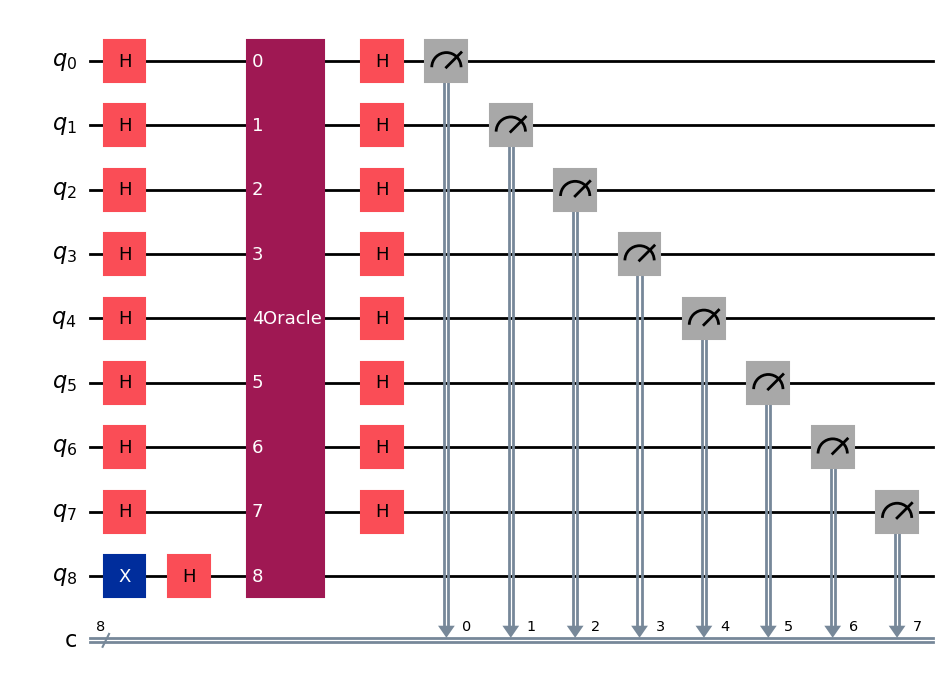

In [19]:
n = 8

oracle_gate = dj_oracle("balanced", n)
dj_cirq = dj_algorithm(oracle_gate, n)
dj_cirq.draw(output='mpl')

Son olarak test edelim simülasyonda

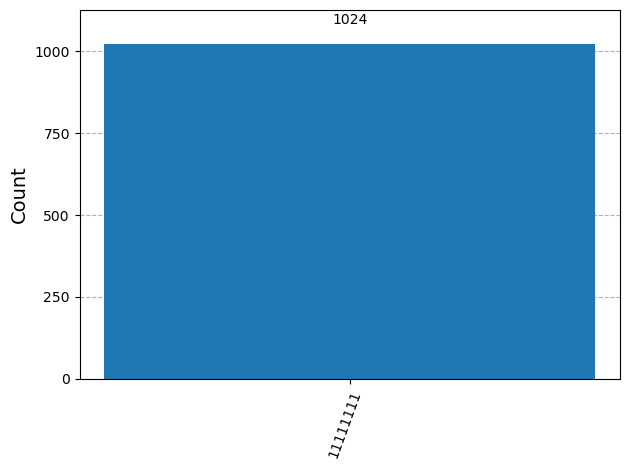

In [20]:
transpiled_dj_Alg = transpile(dj_cirq, aer_sim)
results = aer_sim.run(transpiled_dj_Alg).result()
answer = results.get_counts()
plot_histogram(answer)

# Kaynakçalar

1. David Deutsch and Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439: 553–558.  [doi:10.1098/rspa.1992.0167](https://doi.org/10.1098%2Frspa.1992.0167).
2. R. Cleve; A. Ekert; C. Macchiavello; M. Mosca (1998). "Quantum algorithms revisited". Proceedings of the Royal Society of London A. 454: 339–354. [doi:10.1098/rspa.1998.0164](https://doi.org/10.1098%2Frspa.1998.0164).